In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.distributions import gamma

sns.set()
%matplotlib inline

In [3]:
# read in the CSV's
calls = pd.read_csv(r'../data/callsForServiceUpdated.csv')

C:\Users\81wingo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean up


In [4]:
calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1085198


In [5]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,inci_id,parent_id,case_id,callsource,street,city,streetonly,geox,geoy,nature,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,long,lat,year,month,dayOfMonth,hour
0,2012324665,NaN,NaN,SELF,OLD RANDLEMAN RD/COLTRANE MILL RD,G,OLD RANDLEMAN RD/COLTRANE MILL RD,1755293.88,800660.13,TRAFFIC STOP,...,651,0,0,S335,-79.826738,35.947098,2012,7,1,0
1,2012324676,NaN,1234238.0,E911,312 MARTIN LUTHER KING JR DR,G,MARTIN LUTHER KING JR DR,1767127.13,843918.75,HEMORRHAGE / LACERATIONS,...,2454,43,965,M261,-79.787921,36.066193,2012,7,1,0
2,2012324686,NaN,NaN,SELF,4525 W WENDOVER AV,G,W WENDOVER AV,1731815.63,838827.63,TRANSPORT TO ANIMAL SHELTER,...,0,0,0,ACO8,-79.907233,36.051380,2012,7,1,0
3,2012324690,NaN,1234239.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,4522,30,3918,M2,-79.648974,36.008188,2012,7,1,0
4,2012324692,2.012325e+09,1206134.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,900,8,0,E44,-79.648974,36.008188,2012,7,1,0
5,2012324697,NaN,1234240.0,E911,5125 MICHAUX RD,G,MICHAUX RD,1744080.88,874458.88,FALLS-BACK INJURIES(TRAUMATIC),...,0,10,0,M241,-79.866796,36.149555,2012,7,1,0
6,2012324704,NaN,1234241.0,E911,1409 DANS RD,G,DANS RD,1778039.38,840417.56,SICK PERSON,...,2295,29,1267,M211,-79.750911,36.056808,2012,7,1,0
7,2012324709,NaN,NaN,SELF,8069 HAW RIVER RD,ST,HAW RIVER RD,1709461.00,897647.69,TRAFFIC STOP,...,112,0,0,S314,-79.984825,36.212362,2012,7,1,0
8,2012324711,NaN,1234242.0,W911,WESTCHESTER DR/N MAIN ST,H,WESTCHESTER DR/N MAIN ST,1697332.38,814158.75,CHEST PAIN,...,2090,17,1323,M221,-80.023017,35.982696,2012,7,1,0
9,2012324715,NaN,NaN,PHONE,8403 MEARS FORK RD,SU,MEARS FORK RD,1759324.13,906703.25,DOMESTIC DISPUTE,...,1109,102,0,S314,-79.816067,36.238478,2012,7,1,0


In [6]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature'] != x['nature2'] else x['nature'] for i,x in calls.iterrows()]

In [7]:
calls.columns


Index(['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'priority',
       'medprior', 'meddislvl', 'rptonly', 'service', 'agency', 'district',
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2ar', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour', 'actualnature'],
      dtype='object')

In [8]:
calls.shape

(1085198, 45)

In [9]:
newdf = calls.drop(columns=['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'medprior', 'meddislvl', 'rptonly', 'service', 
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2ar', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour'])

In [27]:
#use sklearn label encoder to convert strings to numbers that can be used for calculations
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in newdf.columns:
    newdf[col] = labelencoder.fit_transform(newdf[col].astype(str))
 
newdf.head()

,priority,agency,district,actualnature
0,0,3,54,106
1,4,1,5,33
2,9,0,60,114
3,0,1,3,85
4,10,2,0,85


In [29]:
newdf.columns


Index(['priority', 'agency', 'district', 'actualnature'], dtype='object')

## Check the R Squared value to see if any of the variables can be used to conclude anything useful

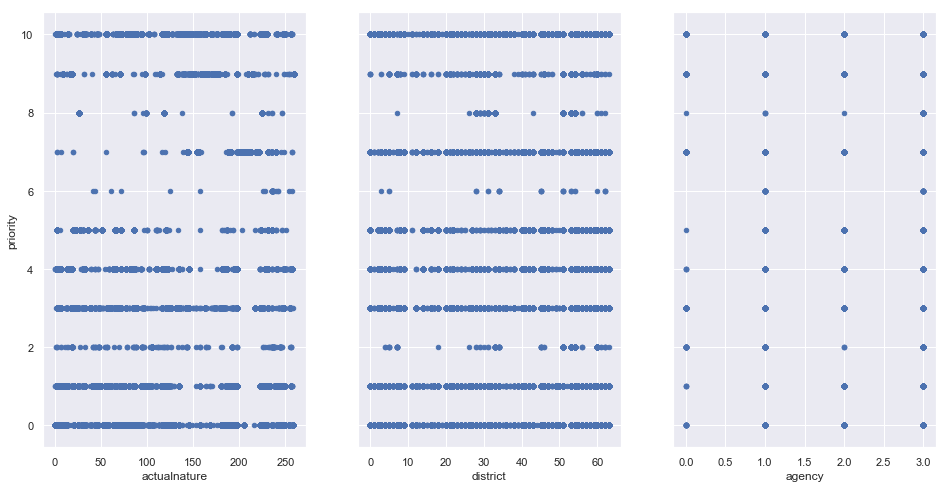

In [30]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='actualnature', y='priority', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='district', y='priority', ax=axs[1])
newdf.plot(kind='scatter', x='agency', y='priority', ax=axs[2])

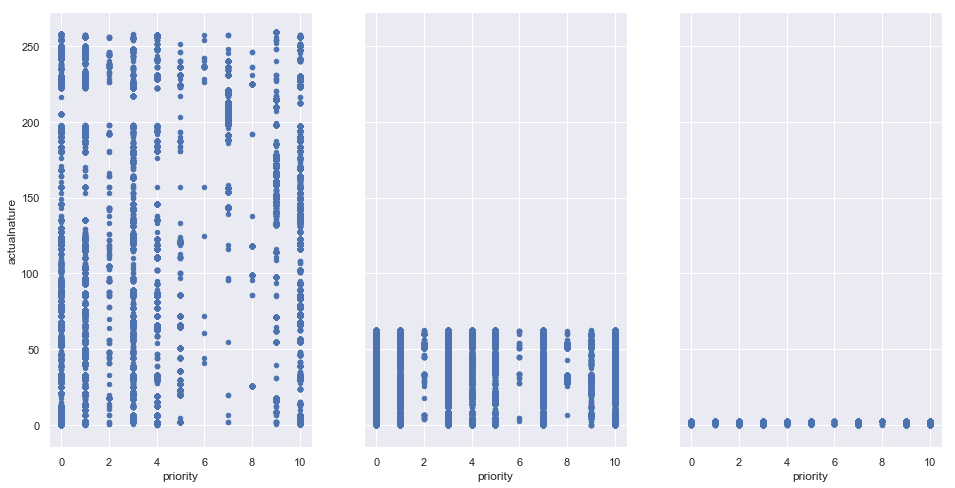

In [31]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='priority', y='actualnature', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='priority', y='district', ax=axs[1])
newdf.plot(kind='scatter', x='priority', y='agency', ax=axs[2])


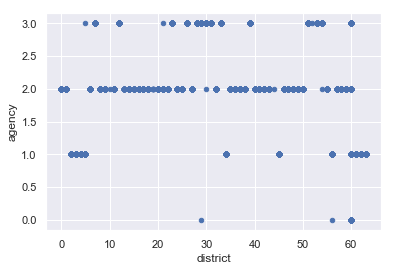

In [32]:
newdf.plot(kind='scatter', x= 'district', y ='agency')

In [45]:
import statsmodels.formula.api as smf
fitdf= smf.ols(formula = 'priority ~ district + agency + actualnature', data= newdf).fit()
fitdf.params

Intercept       2.727347
district        0.016249
agency         -0.730034
actualnature    0.008432
dtype: float64

In [49]:
fitdf.rsquared

0.0956573611427245

In [46]:
fitdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priority   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                 3.826e+04
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:20:24   Log-Likelihood:            -2.8002e+06
No. Observations:             1085198   AIC:                         5.600e+06
Df Residuals:                 1085194   BIC:                         5.600e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7273      0.011    257.016      0.000       2.707       2.748
district         0.0162      0.000     95.089      0.000       0.016       0.017
agency          -0.7300      0.003   -255.144      0.000      -0.736      -0.724
actualnature     0.0084   4.03e-05    208.990      0.000       0.008       0.009
==============================================================================
Omnibus:                    92749.340   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113983.267
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       2.695   Cond. No.                         539.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""